<a href="https://colab.research.google.com/github/junehyung1112/hello-world/blob/master/8%EA%B0%95_%EC%9D%B8%EA%B3%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#퍼세트론 = 사람의 신경 체계를 구현한 인공신경망.
#회귀, 이진분류, 다중 분류 모두에 적용할 수 있는 일반화된 방법.
#인간의 신경망 : 입력신호를 받아들이고 이를 처리한 뒤 신호 전달해서 출력 결과를 내보냄.
#외부 자극은 다른 말단으로부터 전달된 신호.
#시냅스라는 공간을 통해 뉴런끼리 의사소통이 가능 전달 물질의 양에 따라 신호 전달 강도를 결정.
#즉 신경 전달 물질의 양과 역치에 의해 데이터의 전달 여부가 결정됨.

#이를 컴퓨터로 얘기하자면,
#인풋 신호(x)를 받으면 시냅스의 연결 강도(w)만큼 인풋 신호를 곱함.(신호 수용)
#모든 입력신호들을 모아서(h:전송 함수) 합한 신호를 전달(신호처리)
#특정 역치를 넘으면 1을 출력 아니면 0을 출력(f(h):활성 함수) (신호 변환)
#활성화 함수로는 계단 함수, sigmod 함수, 하이퍼 탄젠트와 같이 다양한 함수 사용 가능.
#간단한 논리 소자를 신경망으로 구축할 수 있으면 복잡한 회로도 만들 수 있음.
#바이어스(y절편)를 넣어서 원점을 지나가지 않는 직선을 만들 수 있음
#이를 통해 데이터를 더 확실히 분류할 수 있음.

#단층 퍼셉트론 : 입력층과 출력층으로 구성된 신경망
#퍼센트론의 한계 :선형 분리 가능한 문제만 학습 가능.
#xor의 경우 비선형분포를 가지고 있어서 퍼셉트론으로 학습이 불가능함.
#하나의 직선이 아닌 두개의 직선이 필요하기 때문.
#이는 다중 분류기를 이용해서 해결 가능하다.
#다층 퍼셉트론: 입력층과 출력층 중간에 은닉층을 추가한 것.(은닉층은 n개)
#이러한 계층 구조를 통해 비선형 분포 학습이 가능.
#딥러닝을 사용한 다층 신경망은 은닉층의 수가 기존 신경망보다 훨씬 많음.
#딥러닝 분야는 은닉층이 깊어져도 학습이 잘 될 수 있는 방법 연구.
#은닉층이 깊어질수록 학습시키기는 매우 어려워짐.




In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sess = tf.Session()

In [0]:
#Not gate
learning_rate = 0.1

x_data = [[0], [1]]
y_data = [[1], [0]]

In [0]:
x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

In [0]:
#실제 x데이터와 y데이터를 담은 placeholder를 정의 float타입, 2차원 행렬
#2차원으로 표현한 이유는 학습 데이터가 몇개 사용될 지 모르기 때문.
x = tf.placeholder(tf.float32, [None, 1]) #[학습데이터의 개수, 학습데이터의 크기]
y = tf.placeholder(tf.float32, [None, 1])

In [0]:
#weight와 bias 함수를 정의하기 위해 random_normal 함수를 사용
w = tf.Variable(tf.random_normal([1,1])) #w의 크기는 행이 1이고 열이 1인 2차원 배열
b = tf.Variable(tf.random_normal([1])) #행이 1인 1차원 벡터
#웨이트가 2차원 배열로 한 이유는 행렬의 곱 연산을 하기 때문.

In [0]:
hypothesis = tf.matmul(x,w) + b #placeholder의 경우 matmul을 사용해서 곱을 구하는 게 쉬움.

In [0]:
cost = tf.reduce_sum(tf.square(hypothesis-y)) #오차를 제곱해서 모두 더하는 함수.
#sqaure는 원소를 제곱하는 함수. reduce_sum은 벡터의 원소를 모두 더해주는 함수.
#예측한 값인 hypothesis에서 실제값 y를 뺀 다음 제곱한 모든 수를 더해 cost를 만듬


In [0]:
#계산한 오차를 최소화하기 위해 경사하강법을 사용.
train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

In [0]:
#정확도를 계산하기 위해 hypothesis의 실제값 y를 비교하기 위해 hypothesis를 0과 1의 값만 갖는 벡터로 변환.
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)#cast함수는 true를 1로 false는 0으로 반환.

In [0]:
#equl함수는 두개의 행렬을 비교. 그 후 cast 함수를 사용해서 true와 false를 1과 0으로 변환
#reduce함수는 모든 행렬의 값을 더해서 그 수만큼 나눠줌.
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))

In [0]:
#not gate학습 시작.
sess.run(tf.global_variables_initializer())

for step in range(10): #학습을 10번 반복.
  sess.run(train, feed_dict={x:x_data, y:y_data}) #트레인 변수를 계산하기 위해 x와 y에 실제 데이터인 x_data와 y_Data로 초기화
  a = sess.run(accuracy, feed_dict={x:x_data, y:y_data}) #accuracy 계산 후 반환 값은 a로.
  print("인식률 ", a)

인식률  1.0
인식률  1.0
인식률  1.0
인식률  1.0
인식률  1.0
인식률  1.0
인식률  1.0
인식률  1.0
인식률  1.0
인식률  1.0


In [0]:
#학습횟수 20번으로 증가
sess.run(tf.global_variables_initializer())

for step in range(20): #학습을 10번 반복.
  sess.run(train, feed_dict={x:x_data, y:y_data}) #트레인 변수를 계산하기 위해 x와 y에 실제 데이터인 x_data와 y_Data로 초기화
  a = sess.run(accuracy, feed_dict={x:x_data, y:y_data}) #accuracy 계산 후 반환 값은 a로.
  print("인식률 ", a)
  #not gate는 단순한 게이트라서 학습 횟수 20번만으로도 충분함.

인식률  0.5
인식률  0.5
인식률  1.0
인식률  1.0
인식률  1.0
인식률  1.0
인식률  1.0
인식률  1.0
인식률  1.0
인식률  1.0
인식률  1.0
인식률  1.0
인식률  1.0
인식률  1.0
인식률  1.0
인식률  1.0
인식률  1.0
인식률  1.0
인식률  1.0
인식률  1.0


In [0]:
#학습이 될 때도 있고 안될 수도 있음.
#따라서 신뢰성 있는 평균 인식률을 계산.

result = [] #평균 인식률을 계산하기 위해 정확도를 저장할 result 리스트 생성.
experiment = 30
for step in range(experiment):
  sess.run(tf.global_variables_initializer()) #반복할 때마다 텐서플로우 변수를 초기화.
  for step in range(10):
      sess.run(train, feed_dict={x:x_data, y:y_data})
      a = sess.run([accuracy], feed_dict={x:x_data, y:y_data}) #accuracy는 스칼라이기 때문에 벡터로 변환.
  result.append(a[0])

print("실험 끝")

실험 끝


[1.0, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 0.5, 0.5, 1.0, 0.0, 1.0, 0.0, 0.5, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0]
0.8166666666666667


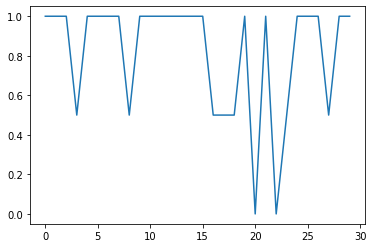

In [0]:
#코드 실행
print(result)
print(sum(result)/experiment) 
plt.plot(result) #30번 실험에 대한 정확도를 출력.
#만약 학습횟수를 20번으로 늘리면 모든 실험에서 정확도가 1로 나옴.
#이렇듯 인식률은 여러번의 실험을 통해 평균적으로 구해야 함.

평균 5  최소 1   최대 17


(array([9., 4., 2., 4., 3., 3., 3., 0., 1., 1.]),
 array([ 1. ,  2.6,  4.2,  5.8,  7.4,  9. , 10.6, 12.2, 13.8, 15.4, 17. ]),
 <a list of 10 Patch objects>)

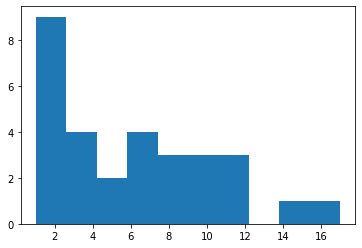

In [0]:
#학습은 몇번을 해야할까.
#언제 학습을 멈춰야 하는지 학습 중지 조건에 대해 알아보자.
result = []
for n in range(experiment):
  sess.run(tf.global_variables_initializer())
  for step in range(100):
      sess.run(train, feed_dict={x:x_data, y:y_data})
      a = sess.run([accuracy], feed_dict={x:x_data, y:y_data})
      if a[0] >= 1.0 :
        break
  result.append(step+1)

print("평균 %d  최소 %d   최대 %d" %(sum(result) / experiment, min(result), max(result)))
plt.hist(result) #학습횟수를 시각적으로 표현.

In [0]:
#입력이 두개인 or게이트와 nand 게이트를 학습.
learning_rate = 0.1
x_data = [[0, 0],       [0, 1],        [1, 0],        [1, 1]] #4행 2열의 리스트
#y_data = [[0],  [0],      [0],   [1]]       # OR 게이트 4행 1열의 리스트
y_data = [[1],  [1],      [1],   [0]]      # NAND 게이트


x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

x = tf.placeholder(tf.float32, [None, 2])
y = tf.placeholder(tf.float32, [None, 1])


w = tf.Variable(tf.random_normal([2, 1]))
b = tf.Variable(tf.random_normal([1]))

In [0]:
hypothesis = tf.matmul(x, w) + b
cost = tf.reduce_sum(tf.square(hypothesis - y))

train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))

In [0]:
sess.run(tf.global_variables_initializer())

for step in range(1000):
        sess.run(train, feed_dict={x: x_data, y: y_data})
        p, a =  sess.run([predicted, accuracy], feed_dict={x: x_data, y: y_data}) #predicted는 p accuracy는 a
        print(step +1 , p.reshape(1,4), a) #원래 predicted는 4*1이지만 옆으로 출력하려고 reshape함수 사용해서 1*4
        if a >= 1.0 :             #정확도가 1.0이 넘으면 학습을 중단함.
            break 

1 [[0. 1. 0. 1.]] 0.25
2 [[0. 1. 0. 1.]] 0.25
3 [[0. 1. 0. 1.]] 0.25
4 [[0. 1. 0. 1.]] 0.25
5 [[0. 1. 0. 1.]] 0.25
6 [[0. 1. 1. 1.]] 0.5
7 [[1. 1. 1. 1.]] 0.75
8 [[1. 1. 1. 1.]] 0.75
9 [[1. 1. 1. 1.]] 0.75
10 [[1. 1. 1. 1.]] 0.75
11 [[1. 1. 1. 1.]] 0.75
12 [[1. 1. 1. 0.]] 1.0


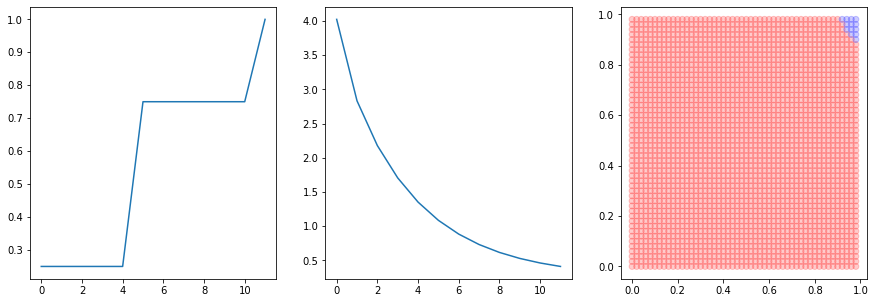

In [0]:
#정확도를 가지고 멈추는 것은 문제점을 발생시킬 수 있음.

sess.run(tf.global_variables_initializer())

result = []
result_cost = []

for step in range(1000):
        sess.run(train, feed_dict={x: x_data, y: y_data})
        a, c =  sess.run([accuracy, cost], feed_dict={x: x_data, y: y_data})
        result.append(a) #드래프로 표현하기 위해 a를 저장
        result_cost.append(c)         #그래프로 표현하기 위해 c를 저장.
        if a >= 1.0 :             
            break 
        
          
plt.figure(1, figsize=(15,5))         #그래프 사이즈 가로 15 세로 5
#첫번째 그래프는 정확도의 변화 두번째는 cost의 변화, 세번째는 decision boundary(학습 결과를 시각화해서 분석)를 출력.
plt.subplot(1,3,1)
plt.plot(result)
plt.subplot(1,3,2)
plt.plot(result_cost)

plt.subplot(1,3,3)
xx, yy = np.mgrid[0:1:0.02, 0:1:0.02] #mgrid를 이용해서 0~1사이의 값을 0.02의 간격 격자로 나눔. 이를 각각 xx와 yy에 저장
grid = np.c_[xx.flatten(), yy.flatten()] #xx와 yy는 모두 50*50 행렬 flat함수를 이용해 1차원 벡터로 변환.
#1차원 벡터를 c함수를 사용해 각각의 열을 결합한 뒤 한 행으로 만들어 grid변수에 저장. grid는 2500*2의 행렬이 됨.
h = sess.run(hypothesis, feed_dict={x: grid})
colors = ["red"  if i>  0.5  else  "blue"  for i  in h   ] #h가 0.5보다 크면 빨강 아니면 파랑. 이를 color변수에 저장.
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2) #xx를 1차원 벡터로 변환한 것을 x축 yy를 1차원벡터로 변환한 거을 y축
#칼라벡터를 통해 개별 데이터에 색상 정보 넣음.  alpha = 투명도를 의미.      
#결과를 보면 정확도가 1.0이어도 cost는 계속 줄어듬을 알 수 있음
#따라서 학습이 중단되는 기준은 cost로 잡아야 함.
#decision boundary를 보면 한쪽으로 치우침.

1 6.6259074
11 0.6266657
21 0.27574542
31 0.25175977
41 0.2501203
51 0.2500082
61 0.25000054


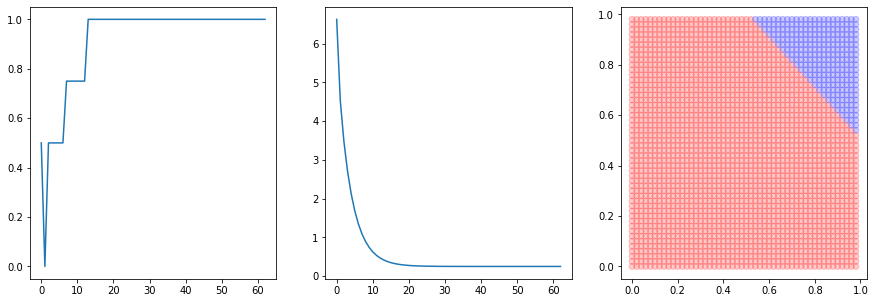

In [0]:
#cost를 기준으로 합격여부 판단.
sess.run(tf.global_variables_initializer())

result = []
result_cost = []

old = 100
for step in range(101):
        sess.run(train, feed_dict={x: x_data, y: y_data})
        a, c =  sess.run([accuracy, cost], feed_dict={x: x_data, y: y_data})
        result_cost.append(c)
        result.append(a)
        if (old - c  <= 0.0000001 ) :      break #cost의 변화가 거의 없다면 학습을 종료하게 함.
        if step % 10 == 0 :  #학습 횟수가 10의 배수일 때 출력.
            print( step+ 1, c  )                
        old = c
          

plt.figure(1, figsize=(15,5))        

plt.subplot(1,3,1)
plt.plot(result)
plt.subplot(1,3,2)
plt.plot(result_cost)

plt.subplot(1,3,3)
xx, yy = np.mgrid[0:1:0.02, 0:1:0.02]
grid = np.c_[xx.flatten(), yy.flatten()]
h = sess.run(hypothesis, feed_dict={x: grid})
colors = ["red"  if i>  0.5  else  "blue"  for i  in h   ]
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)     
#결정 경계가 한쪽으로 치우쳐있지 않고 정확도가 1.0에도 코스트가 계속 줄어듬을 알 수 있음.
#코드를 여러번 실행해도 결정경계가 항상 유사함을 알 수 있음.

1 3.0091496
11 2.3408828
21 2.3334203
31 2.3333342
41 2.3333333
51 2.3333335
61 2.3333333
71 2.3333333
81 2.3333335
91 2.3333335
101 2.3333335


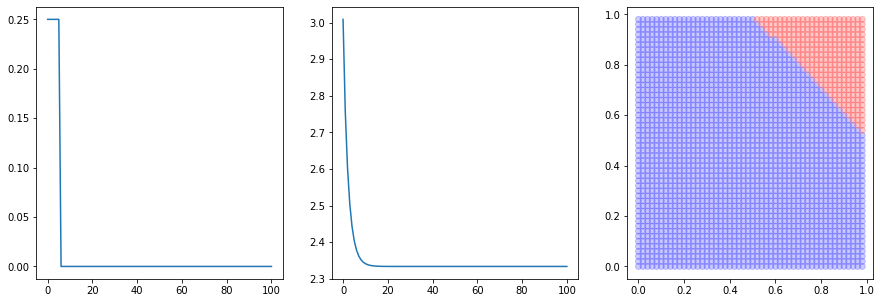

In [0]:
#바이어스의 중요성 확인.
learning_rate = 0.1
x_data = [[0, 0],       [0, 1],        [1, 0],        [1, 1]] #학습 데이터 = nand 게이트
y_data = [[1],  [1],      [1],   [0]]  

x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

x = tf.placeholder(tf.float32, [None, 2])
y = tf.placeholder(tf.float32, [None, 1])


w = tf.Variable(tf.random_normal([2, 1]))
b = tf.Variable(tf.random_normal([1]))

# 바이어스 제거
hypothesis = tf.matmul(x, w)

cost = tf.reduce_sum(tf.square(hypothesis - y))

train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))



sess.run(tf.global_variables_initializer())

result = []
result_cost = []

old = 100
for step in range(101): #무조건 101번 학습하도록 함.
        sess.run(train, feed_dict={x: x_data, y: y_data})
        a, c =  sess.run([accuracy, cost], feed_dict={x: x_data, y: y_data})
        result_cost.append(c)
        result.append(a)
        if step % 10 == 0 : 
            print( step+ 1, c  )                
        old = c
          

plt.figure(1, figsize=(15,5))        

plt.subplot(1,3,1)
plt.plot(result)
plt.subplot(1,3,2)
plt.plot(result_cost)

plt.subplot(1,3,3)
xx, yy = np.mgrid[0:1:0.02, 0:1:0.02]
grid = np.c_[xx.flatten(), yy.flatten()]
h = sess.run(hypothesis, feed_dict={x: grid})
colors = ["red"  if i>  0.5  else  "blue"  for i  in h   ]
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)
#바이어스 미사용시 학습 횟수와 상관없이 학습이 제대로 수행되지 않음.

In [0]:
#바이어스를 신경망에 적용하는 2가지 방법.
#1: 바이어스를 따로 정의한 뒤,  hypothesis에서 bias를 더해주는 방법.
#2: 항상 1이라는 값을 갖는 데이터의 입력 차원을 하나 더 늘려줌.
#이번에는 2번 방법을 사용 
learning_rate = 0.1 
x_data = [[0, 0, 1],       [0, 1, 1],        [1, 0, 1],        [1, 1, 1]] #3번째 데이터는 bias를 의미. 4*3 행렬이 됨.
y_data = [[1],  [1],      [1],   [0]]   #학습 데이터는 nand 게이트.

x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

x = tf.placeholder(tf.float32, [None, 3]) #열의 크기를 3으로 변환.
y = tf.placeholder(tf.float32, [None, 1])


w = tf.Variable(tf.random_normal([3, 1]))

hypothesis = tf.matmul(x, w) #+b 수식은 없음.

cost = tf.reduce_sum(tf.square(hypothesis - y))

train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))

sess.run(tf.global_variables_initializer())


old = 100
for step in range(101): #현재와 이전의 cost를 비교해서 변화가 작을 경우  학습을 중단.
        sess.run(train, feed_dict={x: x_data, y: y_data})
        a, c =  sess.run([accuracy, cost], feed_dict={x: x_data, y: y_data})
        if (old - c  <= 0.0000001 ) :     
            break
        if step % 10 == 0 : 
            print( step+ 1, c)                
        old = c      
print("인식률 ", a)


1 2.6532314
11 0.3695994
21 0.25814164
31 0.25055617
41 0.250038
51 0.25000256
인식률  1.0


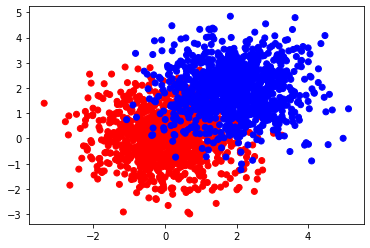

In [0]:
#평균이 다른 두개의 정규 분포를 분류할 수 있는 신경망을 학습.
samples = 1000 #그룹당 학습 데이터 수는 1000개
x_data1 = np.random.normal(0, 1, size=[samples,2]) #평균이 0 표준편차 1
x_data2 = np.random.normal(2, 1, size=[samples,2]) #평균이 2 표준편차 1
x_data = np.vstack([x_data1, x_data2]) #vstack함수를 이용해 x와 y를 위아래로 연결해 x 데이터에 저장. 따라서 2000*2 행렬이 됨. 
y_data = np.hstack([np.zeros(samples), np.ones(samples)]).reshape(samples*2,1)
#zeros 함수를 사용해 학습 데이터 수만큼 일차원 벡터를 생성 모두 0으로 초기화.
#ones 함수를 사용해 학습 데이터 수만큼 일차원 벡터를 생성 모두 1로 초기화.
#만든 1차원 스택들을 hstack함수를 통해 옆으로 연결.
#결과적으로 2000개의 1차원 벡터가 됨.
#계산을 위해 reshape를 이용해 2000개의 행과 1개의 열을 가진 열벡터로 만들어줌


colors = ["red"  if i == 0  else  "blue"  for i  in y_data   ] #y_data의 값에 따라 색깔 다르게 함.
plt.scatter(x_data[:,0], x_data[:,1], color=colors) #scatter함수를 통해 그래프로 출력.
#빨간색은 첫번째 그룹 파란색은 두번째 그룹.

In [0]:
learning_rate = 0.1

x = tf.placeholder(tf.float32, [None, 2]) #입력차원이 두개.
y = tf.placeholder(tf.float32, [None, 1])


w = tf.Variable(tf.random_normal([2, 1]))
b = tf.Variable(tf.random_normal([1]))

In [0]:
hypothesis = tf.sigmoid(tf.matmul(x, w) + b)

cost = -tf.reduce_mean(y * tf.log(hypothesis) + (1 - y) * tf.log(1 - hypothesis)  
#두개의 분포에 관한 것이기 때문에 logistic 회귀에서 배운 log 함수를 사용해 cost를 정의하고
#경사하강법을 이용해 최적화 함.

train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))

In [0]:
sess.run(tf.global_variables_initializer())

for step in range(1000):
        sess.run(train, feed_dict={x: x_data, y: y_data}) #학습 시작.

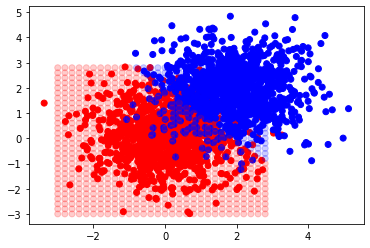

In [0]:
colors = ["red"  if i == 0  else  "blue"  for i  in y_data   ] #학습결과를 시각화하기 위해 결정경계면을 출력.
plt.scatter(x_data[:,0], x_data[:,1], color=colors)

xx, yy = np.mgrid[-3:3:0.2, -3:3:0.2] #mgrid를 사용해 -3~3까지를 0.2간격으로 분할.
grid = np.c_[xx.flatten(), yy.flatten()]
p = sess.run(hypothesis, feed_dict={x: grid})
colors = ["red"  if i <  0.5  else  "blue"  for i  in p   ] #예측값이 0.5보다 작으면 빨간색 아니면 파란색
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)   

#학습데이터들이 겹쳐진 경계부분만 빼면 학습이 잘 되어서 두 부분이 잘 나누어졌음을 알 수 있음.

In [0]:
#선형으로 분류할 수 없는 xor 논리 게이트를 학습.
learning_rate = 0.1
x_data = [[0, 0],       [0, 1],        [1, 0],        [1, 1]]
y_data = [[0],  [1],      [1],   [0]] #xor 게이트.

x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

x = tf.placeholder(tf.float32, [None, 2])
y = tf.placeholder(tf.float32, [None, 1])


w = tf.Variable(tf.random_normal([2, 1]))
b = tf.Variable(tf.random_normal([1]))


In [0]:
#cost함수는 이진 분류 문제여서 평균제곱근 오차가 아니라 log함수를 사용.
hypothesis = tf.sigmoid(tf.matmul(x, w) + b)

cost = -tf.reduce_mean(y * tf.log(hypothesis) + (1 - y) * tf.log(1 - hypothesis)) 

train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))

In [0]:
sess.run(tf.global_variables_initializer())

result = []
result_cost = []

for step in range(1001):
        sess.run(train, feed_dict={x: x_data, y: y_data})
        p, a, c =  sess.run([predicted, accuracy, cost], feed_dict={x: x_data, y: y_data})
        result.append(a)        
        result_cost.append(c)        
        if step % 100 == 0 :
            print(step+1, p.reshape(1,4), a, c) #보기편하게 하려고 reshape 수행.
print("학습완료")   
#천번을 학습해도 정확도가 1이 되지 않음.
       

1 [[1. 1. 1. 1.]] 0.5 1.4681071
101 [[1. 0. 1. 0.]] 0.5 0.7708903
201 [[1. 0. 1. 0.]] 0.5 0.7234275
301 [[1. 0. 1. 0.]] 0.5 0.7053257
401 [[1. 0. 1. 0.]] 0.5 0.69819754
501 [[1. 0. 1. 0.]] 0.5 0.6953005
601 [[1. 0. 1. 0.]] 0.5 0.69408524
701 [[1. 0. 1. 0.]] 0.5 0.69356215
801 [[1. 0. 1. 0.]] 0.5 0.6933327
901 [[1. 1. 1. 0.]] 0.75 0.6932306
1001 [[1. 1. 1. 0.]] 0.75 0.6931849
학습완료


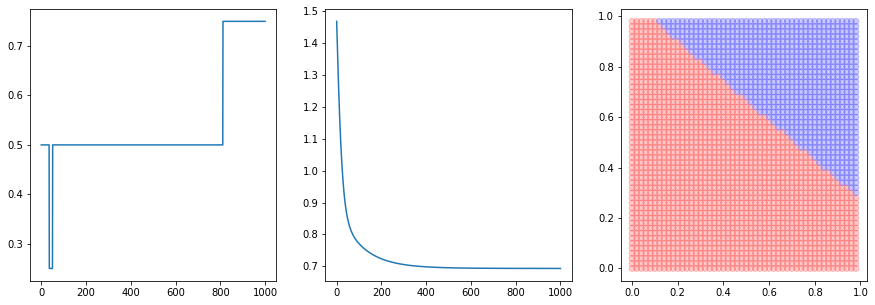

In [0]:
plt.figure(1, figsize=(15,5))

plt.subplot(1,3,1)
plt.plot(result) #정확도

plt.subplot(1,3,2)
plt.plot(result_cost) #cost값

plt.subplot(1,3,3)                
xx, yy = np.mgrid[0:1:0.02, 0:1:0.02] #결정경계면.
grid = np.c_[xx.flatten(), yy.flatten()]
p = sess.run(hypothesis, feed_dict={x: grid})
colors = ["red"  if i>  0.5  else  "blue"  for i  in p   ]
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2) 
#학습이 되지 않은 이유는 xor분포는 두개의 그룹으로 분류되어 있는데 학습된 결정경계면은 하나 밖에 없기 때문.  

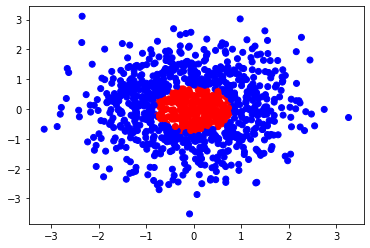

In [0]:
#도넛 모양의 비선형 분포 분류
samples = 1000
x_data = np.random.normal(0, 1, size=[samples,2]) #천개를 랜덤하게 생성.
d = np.sqrt([x[0]**2+x[1]**2  for x in x_data ]) #거리에 따라 학습데이터를 두 그룹으로 분류.
y_data = np.array([0  if   i < 0.8   else   1 for i  in d   ]).reshape(samples, 1)
#y_data의 경우 중심에서 거리가 0.8 미만 이상인 그룹으로 나눔.
#각각의 점이 중심에서 떨어진 거리는 첫번째 행을 제곱한 값과 두번째 행을 제곱한 값을 더해 제곱근을 씌우면 됨/

colors = ["red"  if   i  == 0  else   "blue"  for i  in y_data   ] 
plt.scatter(x_data[:,0], x_data[:,1], color=colors)

In [0]:
x = tf.placeholder(tf.float32, [None, 2])
y = tf.placeholder(tf.float32, [None, 1])

w = tf.Variable(tf.random_normal([2, 1]))
b = tf.Variable(tf.random_normal([1]))


hypothesis = tf.sigmoid(tf.matmul(x, w) + b)

cost = -tf.reduce_mean(y * tf.log(hypothesis) + (1 - y) * tf.log(1 - hypothesis)) 

train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))

In [0]:
sess.run(tf.global_variables_initializer())

result = []
result_cost = []


for step in range(1001):
        sess.run(train, feed_dict={x: x_data, y: y_data})
        a, c =  sess.run([accuracy, cost], feed_dict={x: x_data, y: y_data})
        result.append(a)        
        result_cost.append(c)        
        if step % 100 == 0 :
            print(step+1,c, a)
print("학습완료")                

#cost가 더 이상 증가하지 않음.

1 1.0129771 0.488
101 0.5725905 0.743
201 0.56841636 0.743
301 0.5683415 0.743
401 0.5683399 0.743
501 0.56833994 0.743
601 0.56833994 0.743
701 0.56833994 0.743
801 0.56833994 0.743
901 0.56833994 0.743
1001 0.56833994 0.743
학습완료


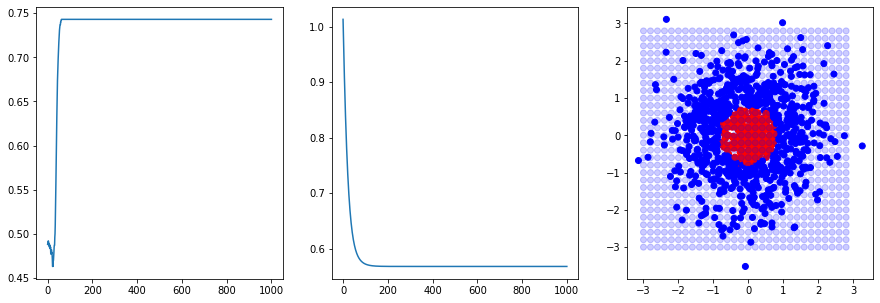

In [0]:
plt.figure(1, figsize=(15,5))

plt.subplot(1,3,1)
plt.plot(result) #정확도
plt.subplot(1,3,2)
plt.plot(result_cost) #cost 값
plt.subplot(1,3,3)
#결정경계면

colors = ["red"  if   i  == 0  else   "blue"  for i  in y_data   ]
plt.scatter(x_data[:,0], x_data[:,1], color=colors)

xx, yy = np.mgrid[-3:3:0.2, -3:3:0.2]
grid = np.c_[xx.ravel(), yy.ravel()]
p = sess.run(hypothesis, feed_dict={x: grid})
colors = ["red"  if i <  0.5  else  "blue"  for i  in p   ]
plt.scatter(np.array([xx]).flatten(), np.array([yy]).flatten(), color = colors, alpha=0.2)       
#비선형이기 때문에 모두 파랑색으로 분류됨
#파란색으로 분류한 이유는 빨간색 그룹의 학습데이터 수가 파란색보다 적기 때문에 오차를 최소화할 수 있음.
#이는 단층 퍼셉트론의 한계를 보여줌.